In [1]:
from UCLSE.dyna_q.Experiment1a import Experiment
import numpy as np
import pandas as pd

In [2]:
trader_pref_kwargs={'qty_min':-5,'qty_max':5,'sigma_pv':1}
timer_kwargs={'start':0,'end':60000,'step':1}
price_sequence_kwargs={'kappa':0.0002,'mean':100,'sigma':1,'block_length':10}
noise_kwargs={'sigma':1}
messenger_kwargs={'logging':True}
env_kwargs={'trader_arrival_rate':1,'recording':True,#'process_verbose':False,
                'bookkeep_verbose':False, 'lob_verbose':False}
sigma_n=5

def cont_coef():
    return np.random.uniform(0.2,0.8)

def personal_memory():
    return int(np.random.uniform(5,10))

trader_kwargs={'ZIP':{'prefix':'ZIP','number':10,'object_name':'WW_Zip',
                          'setup_kwargs':
                                {'market_make':True,'prior':(100,sigma_n)}},
               'HBL':{'prefix':'HBL','number':10,'object_name':'HBL',
                          'setup_kwargs':
                              {'memory':100,'grace_period':20}},
               'CON':{'prefix':'CON','number':10,'object_name':'ContTrader',
                      'setup_kwargs':
                          {'cont_coeff':cont_coef,'personal_memory':personal_memory,'profit_target':4, 'market_make':True,
                          'prior':(100,sigma_n)}},
               'NOI':{'prefix':'NOI','number':10,'object_name':'NoiseTrader',
                          'setup_kwargs':{'memory':20}}
              }

lobenv_kwargs={'cutoff':100,'profit_target':10,'loss_limit':-2}

In [3]:
dyna_config={
	"double_q_model": False,
	"batch_size": 128,
	"learning_rate": 5e-3,
	"exploration": {
		"type": "exponential",
		"init_epsilon": 0.8,
		"min_epsilon": 0.05,
		"decay_steps": 100000,
		"decay_eps": 0.99,
        "choice":'least_bonus'
	},
	"memory": {
		"memory_capacity": 1000000,
		"prioritized": False,
        "tabular memory":True,
        
	},
	"discount": 0.99,
	"target_update_freq": 100,
	"first_update": 200,
	"modify_reward": False,
    "learn":'Q',
    'double_q_model':True
    #"clipping":1
    
}

In [4]:
agent_kwargs={'CVAE':True,'latent_dim':2,'recon_weight':0.1,'kl_thresh':0.01,
                   'env_H1Size':32,'env_H2Size':16,'Q_H1Size':32,'Q_H2Size':16,
                   'doneModel':None,'rewardModel':None,'loss_func':None}

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
90    26   21  HBL2_26_0 1     NaN  HBL2
92    14   8   ZIP6_14_0 1     NaN  ZIP6
96    5    0   HBL7_5_0  1     NaN  HBL7
97    8    1   ZIP8_8_0  1     NaN  ZIP8
      21   16  ZIP4_21_2 1     NaN  ZIP4
      24   19  ZIP3_24_2 1     NaN  ZIP3
      27   22  CON2_27_1 1     NaN  CON2
98    19   12  ZIP7_19_0 1     NaN  ZIP7
100   20   14  CON8_20_0 1     NaN  CON8
102   14   9   ZIP6_14_1 1    ZIP6   NaN
      21   17  ZIP4_21_3 1    ZIP4   NaN
103   8    2   ZIP8_8_1  1    ZIP8   NaN
104   20   15  CON8_20_1 1    CON8   NaN
105   10   4   HBL3_10_1 1    HBL3   NaN
108   24   20  ZIP3_24_3 1    ZIP3   NaN
110   19   13  ZIP7_19_1 1    ZIP7   NaN
111   13   7   HBL4_13_0 1    HBL4   NaN
113   28   25  HBL9_28_1 1    HBL9   NaN
sequence made
adding exchange to RL trader  RL
adding excha

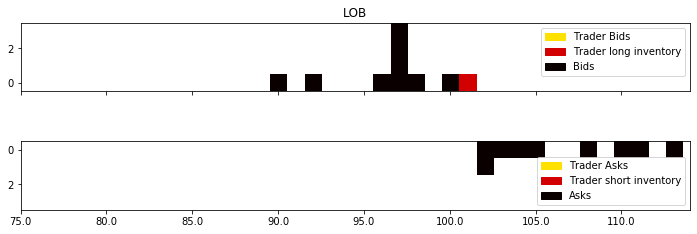

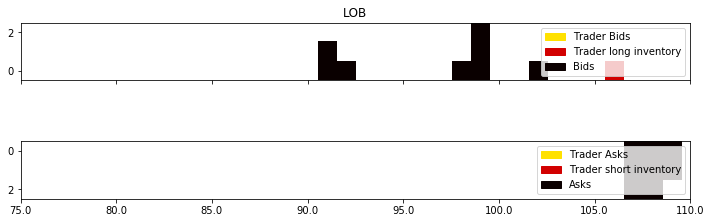

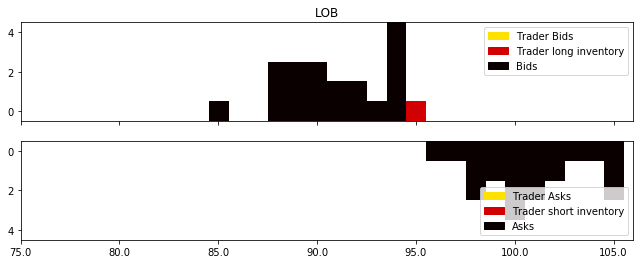

In [5]:
experiment=Experiment(trader_pref_kwargs,timer_kwargs,
           price_sequence_kwargs,noise_kwargs,
           messenger_kwargs,env_kwargs,trader_kwargs,
           lobenv_kwargs,dyna_config,agent_kwargs)

In [6]:
experiment.new_train(MaxEpisodes=100,K=5,lookback=50,thresh=5,planning=True)

Planning is True, double Q model is True, tabular memory is True
Dyna-Q - EXP  1 | Ep:  1 | timestep:  17 | Ep_r:  -1.064 Avg loss: -1.064
copying eval net to target net
Dyna-Q - EXP  1 | Ep:  11 | timestep:  26 | Ep_r:  -1.008 Avg loss: -1.1
Dyna-Q - EXP  1 | Ep:  21 | timestep:  14 | Ep_r:  -1.096 Avg loss: -1.1
Dyna-Q - EXP  1 | Ep:  31 | timestep:  1 | Ep_r:  -1.1 Avg loss: -1.1
Dyna-Q - EXP  1 | Ep:  41 | timestep:  94 | Ep_r:  -0.8879999999999997 Avg loss: -1.1
Dyna-Q - EXP  1 | Ep:  51 | timestep:  100 | Ep_r:  -3.5999999999999996 Avg loss: -1.1
Dyna-Q - EXP  1 | Ep:  61 | timestep:  100 | Ep_r:  1.2920000000000005 Avg loss: -1.1
Dyna-Q - EXP  1 | Ep:  71 | timestep:  74 | Ep_r:  -1.912 Avg loss: -1.1
Dyna-Q - EXP  1 | Ep:  81 | timestep:  6 | Ep_r:  -1.08 Avg loss: -1.09
Dyna-Q - EXP  1 | Ep:  91 | timestep:  74 | Ep_r:  3.876 Avg loss: -1.09


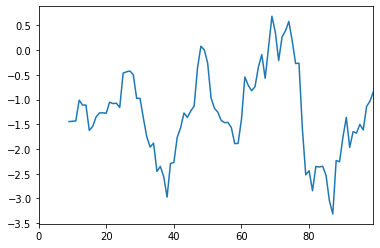

In [7]:
rl=pd.DataFrame(np.array(experiment.rwd_dyna))#.rolling(10).mean().plot()
rl.columns=['reward','time']
#rl=rl.set_index('time')
rl.rolling(10).reward.mean().plot()

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
89    27   18  HBL5_27_1 1     NaN  HBL5
91    2    0   ZIP6_2_0  1     NaN  ZIP6
      14   9   ZIP3_14_0 1     NaN  ZIP3
92    21   15  ZIP0_21_0 1     NaN  ZIP0
94    5    3   ZIP8_5_0  1     NaN  ZIP8
95    29   21  HBL7_29_0 1     NaN  HBL7
97    4    2   HBL2_4_0  1     NaN  HBL2
98    28   19  ZIP1_28_2 1     NaN  ZIP1
100   31   24  CON5_31_0 1     NaN  CON5
102   32   26  CON0_32_2 1     NaN  CON0
104   2    1   ZIP6_2_1  1    ZIP6   NaN
      12   8   CON4_12_0 1    CON4   NaN
      31   25  CON5_31_1 1    CON5   NaN
105   17   12  HBL0_17_0 1    HBL0   NaN
106   32   27  CON0_32_3 1    CON0   NaN
108   18   13  HBL8_18_1 1    HBL8   NaN
      19   14  HBL3_19_0 1    HBL3   NaN
109   14   10  ZIP3_14_1 1    ZIP3   NaN
      28   20  ZIP1_28_3 1    ZIP1   NaN
device in use is c

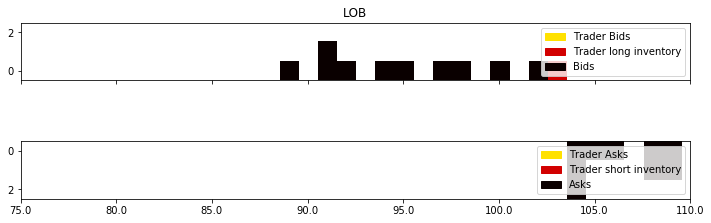

In [8]:
experiment.test_setup(MaxEpisodes=250)

In [9]:
experiment.lobenv_test.trader.balance

-203

In [10]:
experiment.rwd_test

[(236, 100, 0, -3.1, -1),
 (439, 200, 1, -2.1, -1),
 (642, 300, 2, -4.2, -3),
 (845, 400, 3, -2.1, -1),
 (1070, 500, 4, -3.1, -1),
 (1273, 600, 5, -7.1, -5),
 (1480, 700, 6, -2.1, -1),
 (1683, 800, 7, -3.1, -1),
 (1901, 900, 8, -1.0999999999999996, 1),
 (2104, 1000, 9, -6.1, -5),
 (2307, 1100, 10, -1.1, 0),
 (2510, 1200, 11, -1.1, 0),
 (2719, 1300, 12, -7.2, -6),
 (2928, 1400, 13, -1.0999999999999999, 2),
 (3131, 1500, 14, -3.2, -2),
 (3343, 1600, 15, -4.1000000000000005, -2),
 (3547, 1700, 16, -3.1, -1),
 (3735, 1785, 17, 3.6, 3),
 (3938, 1885, 18, -6.1, -3),
 (4141, 1985, 19, -6.1, -3),
 (4344, 2085, 20, -6.1, -3),
 (4547, 2185, 21, -3.1, -2),
 (4750, 2285, 22, -6.1, -3),
 (4953, 2385, 23, -6.1, -4),
 (5159, 2485, 24, -9.100000000000001, -7),
 (5362, 2585, 25, -5.199999999999999, -4),
 (5559, 2651, 26, 3.6, 1),
 (5852, 2751, 27, -9.100000000000001, -5),
 (6215, 2851, 28, 0.9000000000000001, 2),
 (6419, 2951, 29, -4.1000000000000005, -2),
 (6622, 3051, 30, -8.2, -8),
 (6825, 3151, 31,